<a href="https://colab.research.google.com/github/arin-dsouza/BIS-LAB/blob/main/Cuckoo%20Search%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-771e81aa8b60>:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  sigma_u = np.power(np.math.gamma(1 + beta) * np.sin(np.pi * beta / 2) / np.math.gamma((1 + beta) / 2) / np.power(2, (beta - 1) / 2), 1 / beta)


Generation 1: Best fitness = 6.688866047361781
Generation 2: Best fitness = 5.047209179130705
Generation 3: Best fitness = 5.047209179130705
Generation 4: Best fitness = 5.047209179130705
Generation 5: Best fitness = 5.047209179130705
Generation 6: Best fitness = 5.047209179130705
Generation 7: Best fitness = 5.047209179130705
Generation 8: Best fitness = 5.047209179130705
Generation 9: Best fitness = 3.9842128786638327
Generation 10: Best fitness = 1.8541517629904334
Generation 11: Best fitness = 1.8541517629904334
Generation 12: Best fitness = 1.8541517629904334
Generation 13: Best fitness = 1.8541517629904334
Generation 14: Best fitness = 1.8541517629904334
Generation 15: Best fitness = 1.8541517629904334
Generation 16: Best fitness = 1.8541517629904334
Generation 17: Best fitness = 1.8541517629904334
Generation 18: Best fitness = 1.8541517629904334
Generation 19: Best fitness = 1.8541517629904334
Generation 20: Best fitness = 1.8541517629904334
Generation 21: Best fitness = 1.85415

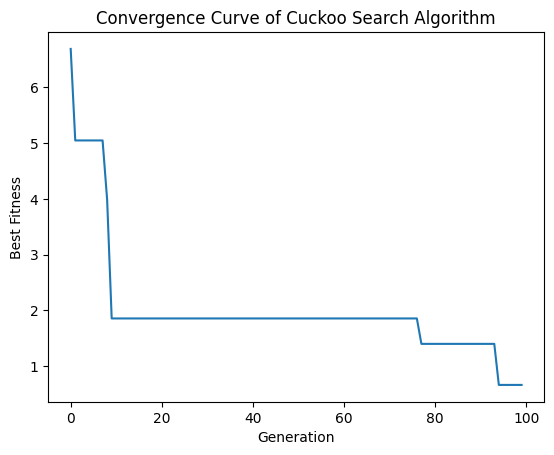

Best solution found: [ 1.75206569 -2.34782288]
Best fitness: 0.6617240017872845


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function: Rastrigin Function
def rastrigin(x):
    A = 10
    return A * len(x) + sum(xi**2 - A * np.cos(2 * np.pi * xi) for xi in x)

# Lévy flight function for generating random steps
def levy_flight(beta=1.5, dim=2):
    sigma_u = np.power(np.math.gamma(1 + beta) * np.sin(np.pi * beta / 2) / np.math.gamma((1 + beta) / 2) / np.power(2, (beta - 1) / 2), 1 / beta)
    sigma_v = 1
    u = np.random.normal(0, sigma_u, dim)
    v = np.random.normal(0, sigma_v, dim)
    return u / np.power(np.abs(v), 1 / beta)

# Cuckoo Search Algorithm
class CuckooSearch:
    def __init__(self, func, dim, population_size, max_generations, pa=0.25, beta=1.5, lower_bound=-5, upper_bound=5):
        self.func = func                # Objective function
        self.dim = dim                  # Dimension of the problem
        self.population_size = population_size  # Number of nests (solutions)
        self.max_generations = max_generations  # Maximum number of generations
        self.pa = pa                    # Probability of alien eggs (nest replacement)
        self.beta = beta                # Lévy flight exponent
        self.lower_bound = lower_bound  # Lower bound of the search space
        self.upper_bound = upper_bound  # Upper bound of the search space

        # Initialize population (nests)
        self.nests = np.random.uniform(self.lower_bound, self.upper_bound, (self.population_size, self.dim))
        self.fitness = np.array([self.func(nest) for nest in self.nests])  # Fitness of each nest
        self.best_nest = self.nests[np.argmin(self.fitness)]  # Best solution found
        self.best_fitness = np.min(self.fitness)  # Best fitness value

    # Update nests using Lévy flights and objective function evaluations
    def generate_new_nests(self):
        new_nests = []
        for i in range(self.population_size):
            step = levy_flight(self.beta, self.dim)
            new_nest = self.nests[i] + step
            # Apply boundary check
            new_nest = np.clip(new_nest, self.lower_bound, self.upper_bound)
            new_nests.append(new_nest)
        return np.array(new_nests)

    # Main cuckoo search algorithm
    def search(self):
        history = []  # To record the best fitness values over generations

        for generation in range(self.max_generations):
            # Generate new nests based on Lévy flight
            new_nests = self.generate_new_nests()
            new_fitness = np.array([self.func(nest) for nest in new_nests])

            # Replace nests with new ones if they are better
            for i in range(self.population_size):
                if new_fitness[i] < self.fitness[i] or np.random.rand() < self.pa:
                    self.nests[i] = new_nests[i]
                    self.fitness[i] = new_fitness[i]

            # Find the best nest in the current population
            current_best_fitness = np.min(self.fitness)
            current_best_nest = self.nests[np.argmin(self.fitness)]

            # Update the global best solution
            if current_best_fitness < self.best_fitness:
                self.best_fitness = current_best_fitness
                self.best_nest = current_best_nest

            # Record the best fitness for the current generation
            history.append(self.best_fitness)
            print(f"Generation {generation+1}: Best fitness = {self.best_fitness}")

        return self.best_nest, self.best_fitness, history

# Analyze the Cuckoo Search Algorithm
def analyze_cuckoo_search():
    # Set up parameters for Cuckoo Search
    dim = 2
    population_size = 50
    max_generations = 100
    cuckoo_search = CuckooSearch(func=rastrigin, dim=dim, population_size=population_size, max_generations=max_generations)

    # Run the Cuckoo Search algorithm
    best_nest, best_fitness, history = cuckoo_search.search()

    # Plot the convergence curve
    plt.plot(history)
    plt.title("Convergence Curve of Cuckoo Search Algorithm")
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.show()

    print(f"Best solution found: {best_nest}")
    print(f"Best fitness: {best_fitness}")

# Run the analysis
analyze_cuckoo_search()
